# Why I Quit My Job To Be A Data Scientist

Before we start let me define some variables:

```
Career_Status = 'Just quit my job after 5 years to pivot into Data Science'

Computer_Science_Experience = 'Self-Study for 1 month and currently one week into the FlatIron School Bootcamp for Data Science'
```

If I could do college over again, I would major in computer science. 

I chose my degree of Chemical and Biomolecular Engineering based on my enjoyment of math/science during high school. I never deviated from this choice even as I neared the end of my college education and saw that most of my career opportunities were unappealing. Instead of using college as a time to explore what I was passionate about, I doubled down on my degree hoping the perfect career would find me. It was only close to graduation when I realized that choosing a degree is in no way the same thing as choosing a career.

I ended up in my previous career as a technical sales representative with Ecolab directly out of college. Due to my lack of exploration in college, I had no exposure to data science and was unaware of the potential career trajectories it could offer me. Thankfully, a small part of my job consisted of data collection and analysis to optimize customer systems by delivering actionable insights. While I didn't use any computer science, I was able to see how powerful data could be and how much I enjoyed working with it.

So that explains the data side of things but what about the computer science? At the beginning of 2021 I spoke to a close friend of mine about buying vacation rental property for passive income. During this conversation he started talking about something called "web scraping". He told me he could write a program that could pull vacation rental data from the internet to help inform our decision on the best location to purchase a property. I quickly tabled our vacation rental discussion and asked him to tell me more about this thing called "web scraping". He told me if I was interested I should start with trying out Python. I was immediately fascinated with learning the language and started teaching myself and working on problems from CodeWars.

In a perfect world I would have loved to continue working for my company, using the experience I had already gained, but switch into solely data science work. After all, as previously mentioned, I was already doing some data analytic-ish work. After asking internally I found out this would not be possible.

So my decisions now were:
* Stay in the same job and be happy that I'm doing at least some data analytic work
* Quit my job and go all-in on data science

Clearly I've already made this choice but for the sake of this blog lets pretend I haven't yet. It would be nice to quantify my time spent at my job working with data analytics to make a more informed decision. Luckily, my new obsession with working with data led me to run a time tracking project for my former sales team over the course of the last 6 months in 2020 using Toggl. Let's take a look at this data and see if I made the right decision. This will also give me a chance to show off my beginner Python skills.

### Business Understanding

Relevant Question:
* Should I quit my job to be a full-time Data Scientist?

In [50]:
'''
Bringing in a generalized (user redacted) time tracking data. Each entry is a task that my sales team would spend time on.
'''
import pandas as pd

data = pd.read_csv('Toggl_time_entries_2020-06-01_to_2020-11-30.csv')
data.head()

,Project,Start date,Start time,End date,End time,Duration
0,Admin - IT Support,9/9/20,20:46:44,9/9/20,21:49:24,1:02:40
1,Admin - Formsite,9/9/20,21:49:27,9/9/20,22:49:40,1:00:13
2,Service - General Onsite,9/9/20,22:49:41,9/10/20,0:28:10,1:38:29
3,Service - Water Safety,9/10/20,13:05:00,9/11/20,0:20:47,11:15:47
4,Admin - Formsite,9/11/20,7:06:28,9/11/20,7:09:40,0:03:12


### Data Exploration

Above we can see that I have timed entries for various tasks. Each entry is a timed task that my sales team would spend time on. The 'Project' and 'Duration' features are the most important columns in this data set. By summing up the duration by unique projects I should be able to get an idea of how much time I spent on data analytics.

### Feature Engineering

But wait we have a problem. The times are stored as string types and displayed as ```'hh:mm:ss'```.

In [51]:
print(f'Type of data stored in "Duration" column is {type(data["Duration"][0])}')

Type of data stored in "Duration" column is <class 'str'>


In it's current state I can't sum these entries together. 2 months ago this would have been the end of the road but today is a different story. Let's write a function to change the string type times to float type in hours and map it over the 'Duration' column.

In [52]:
'''
Takes in a time string as an argument and returns time in hours as a float rounded to three decimal places
'''

def timestr_to_time_in_hours(time):
    list_ = time.split(':')
    return round(int(list_[0]) + float(list_[1]) / 60 + float(list_[2]) / (60 ** 2) , 3)

# Test
timestr_to_time_in_hours('1:02:40')

1.044

In [53]:
''' 
Adding a new column to data with the duration in hours (float)
'''

data['Duration_(Hours)'] = data['Duration'].map(timestr_to_time_in_hours)

#Checking new column
data.head()

,Project,Start date,Start time,End date,End time,Duration,Duration_(Hours)
0,Admin - IT Support,9/9/20,20:46:44,9/9/20,21:49:24,1:02:40,1.044
1,Admin - Formsite,9/9/20,21:49:27,9/9/20,22:49:40,1:00:13,1.004
2,Service - General Onsite,9/9/20,22:49:41,9/10/20,0:28:10,1:38:29,1.641
3,Service - Water Safety,9/10/20,13:05:00,9/11/20,0:20:47,11:15:47,11.263
4,Admin - Formsite,9/11/20,7:06:28,9/11/20,7:09:40,0:03:12,0.053


### Data Visualization

So now I have the features I want to visualize. I specifically care about the task ```"Service - Water Safety"```, as this is the task that involves data analytics. 

Plotting the grouped tasks and summing the new ```'Duration_(Hours)'``` column gives the following:

<AxesSubplot:ylabel='Task'>

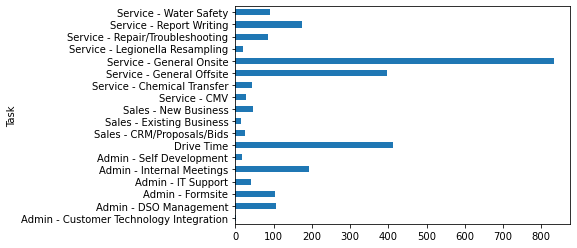

In [54]:
'''
Plotting total task durations over a 3 month period
'''
data.groupby(['Project'])['Duration_(Hours)'].sum().plot(kind='barh',xlabel='Task',ylabel='Duration (Hours)')

Here is the percent time spent on ```'Service - Water Safety'```:

In [60]:
grouped_data = data.groupby(['Project'])['Duration_(Hours)'].sum()

sum_ = 0
for i in range(18):
    sum_ += round(grouped_data.iloc[i] , 4)

percent_water_safety = round(grouped_data.iloc[17] / sum_ , 4) * 100

print(f'{percent_water_safety}% of my time was spent on data analytics')

3.45% of my time was spent on data analytics


### Final Decision

I didn't set a benchmark for what would be enough data science but I think it's safe to say that 3.45% is NOT enough. It looks like I made the right decision.

# Blog 2 Ideas (NOT FINISHED)

I've been ragging on my previous job but it wasn't all bad. In fact I'd still like to use what I learned in my new career. A central theme in my in my experience with data has been risk management. How can we use leading indicators to make proactive decisions to prevent something bad from happening? In order for me to explain my passion project, I need to get you up to speed on the exciting world of water managmeent and safety. 

# Crash Course In Water Managment and Safety

In 1976, members of the American Legion held a convention at the Belvue-Stratford Hotel in Philadelphia. Within a week following the convention 130 members had been hospitalized and 25 had died of an unknown illness. 

<img src='https://s1.nyt.com/timesmachine/pages/1/1982/01/19/177658_360W.png?quality=75&auto=webp&disable=upscale' style = 'width:300px;'/>      <img src='Screen Shot 2021-09-06 at 12.38.25 PM.png' style = 'width:300px;'/>

Over the next several years, additional cases and outbreaks came to light linked to the same unknown disease. The cause and vector of infection was eventually determined to be aspiration of water contaminated with the bacteria Legionella pneumophila. Stuides showed the source water could come from showers, sinks, jacuzzi's, fountains or HVAC cooling systems. The general public assumption before these cases was that a municipality could manage the requirements for providing safe water at a point of use. These new findings brought to light that a building water system's condition can internally deteriorate and provide growing conditions for waterborne pathogens. The need for building managers to manage their individual water systems became apparent and thus the field of building water management and safety was created.

<img src='https://www.cdc.gov/legionella/images/national-incidence.jpg'>

Water Management is the exersize of minimizing the growth potential for waterborne pathogens in engineered water systems. In practice, a building will have a program or plan that they follow that keeps them within best practice operating conditions. The general idea is to keep a water system operating in conditions as far away from bacteria growing conditions as possible. These water management plans also have remedial actions to complete if a water system is deemed out of spec. 

That being said, the history of water safety is filled with retrospective work. Just a decade ago, many facilities would discover their water system issues through someone getting sick or dying. Only then would any sort of water management be looked at as necessary. Within the last five years new laws and regulations have come into effect requiring facilities to manage their water systems to a higher standard. This includes monitoring/documenting water quality and making adjustments to keep the water system within a set of standard best practice specifications. The parameters for monitoring water quality serve as leading indicators for a water system's condition.

Some Examples of Monitored Indicators:

|  Leading Indicators   |     Lagging Indicators         |
|-----------------------|--------------------------------|
|   Chlorine Residual   | Legionare's Disease Infections |
|   Water Temperature   |        Legionella Test         |
| Maintenace Compliance |                                |

Instead of waiting for someone to get sick (lagging indicator), these leading indicators can shift water management from reactive to proactive. There are now thousands of facilities in the United States alone collecting data on their water systems. T

The presence of Legionella in a water system, while a risk itself, can also serve as an indicator for the presence of other robust, infectious, bacteria colonies. The c

# The Passion Project

I believe the bacteria growth potential of a water system can be predicted based on a model using only leading indicators. A predictive model for waterborne pathogen growth could help drive decision making around a building's water system. 

This is not a brand new theory but one has not been fully realized and brought to market. 

# BLOG 2 CITATIONS

* ['Biofilms: The Stronghold of Legionella pneumophila', Mena Abdel-Nour et al](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3856027/)
* [The Sunday Star News - 'Legionnaire's Disease may be spread by water' - Sept 3 1978, N.Y. Times News Service](https://news.google.com/newspapers?nid=rQKKVauEoioC&dat=19780903&printsec=frontpage&hl=en)
* [New York Times - 'LEGIONNAIRE'S DISEASE: 5 YEARS LATER THE MYSTERY IS ALL BUT GONE' - January 19 1982, Harold M. Schmeck Jr.](https://www.nytimes.com/1982/01/19/science/legionnaire-s-disease-5-years-later-the-mystery-is-all-but.html)
* [Time Magazine -'The Philadelphia Killer' - August 16 1976](http://content.time.com/time/subscriber/article/0,33009,914553-1,00.html)
* [CDC - 'Legionella'](https://www.cdc.gov/legionella/about/history.html)

In [64]:
'''
Calculates the Word Count in Markdown Cells of this Jupyter Notebook
'''
import io
from IPython.nbformat import current

with io.open('blog1.ipynb', 'r', encoding='utf-8') as f:
    nb = current.read(f, 'json')

word_count = 0
for cell in nb.worksheets[0].cells:
    if cell.cell_type == "markdown":
        word_count += len(cell['source'].replace('#', '').lstrip().split(' '))
print(f'Word Count = {word_count}')

Word Count = 1502
